In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In df my Target variable is quality

In [4]:
df.shape

(1599, 12)

We have 1599 Rows and 12 Columns

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All are Float type and my target column (quality) are Integer

In [6]:
# Statistical summary

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# checking the null value in dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no any missing value in my dataset

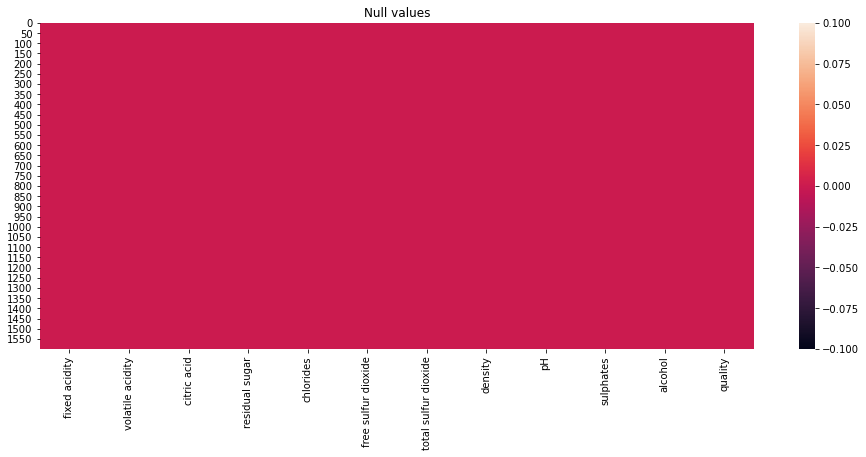

In [8]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There is no any null value same show in above graph

In [42]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


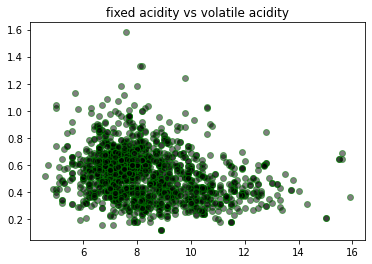

In [10]:
plt.scatter(df['fixed acidity'],df['volatile acidity'],alpha=0.5,c=(0,0,0),edgecolors='g') # Example of Bivariate analysis
plt.title('fixed acidity vs volatile acidity')
plt.show()

Both column have little bit relationship

## Checking correlation

In [11]:
corr_mat = df.corr() # Example of Multi variate analysis

In [12]:
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


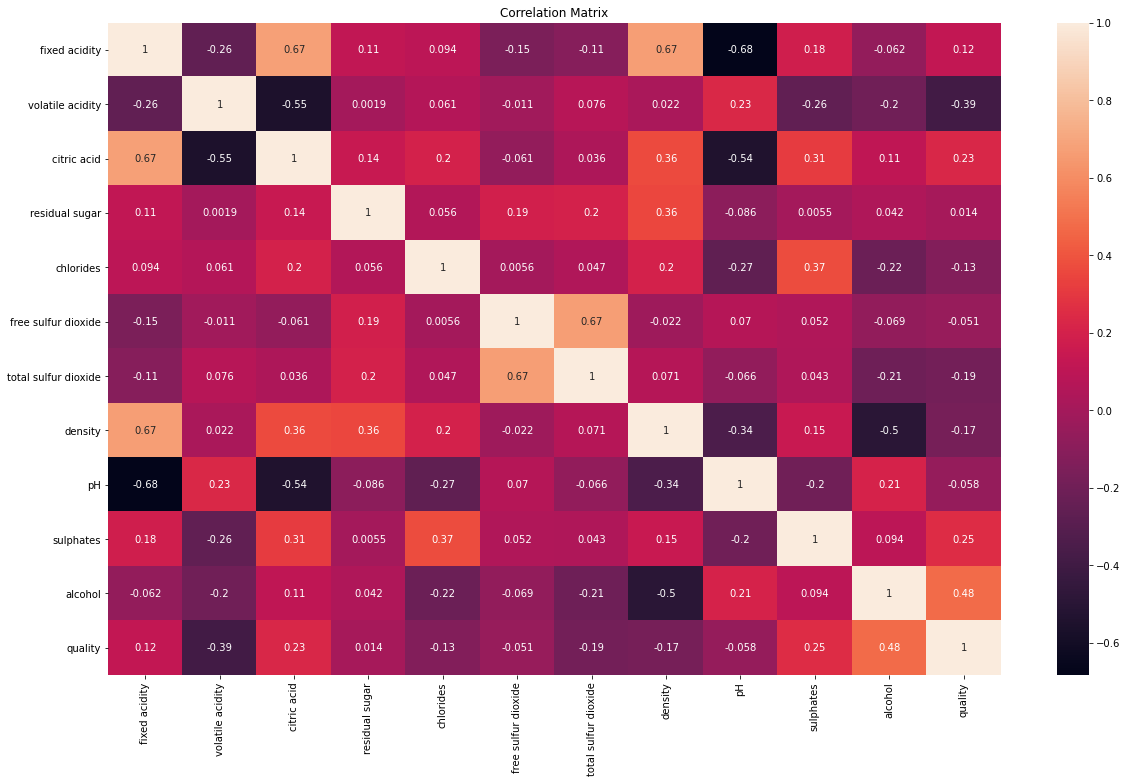

In [13]:
plt.figure(figsize=[20,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

alcohol,sulphates and volatile acidity are highly corelation and ph are very low relationship

In [43]:
corr_matrix = df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

All values lies between -0.5 to 0.5.Except the target variable

### Lets check the data distribution among all the columns

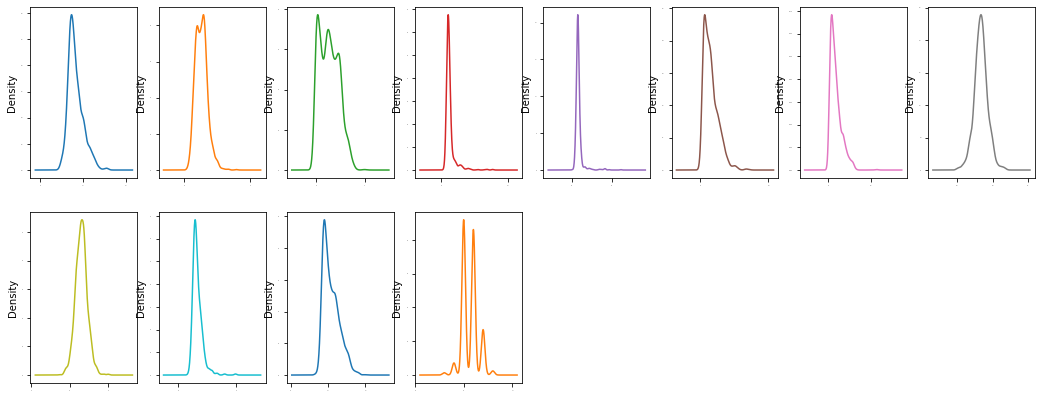

In [16]:
# Another example of multi variate analysis

df.plot(kind= 'density',subplots=True,layout=(6,8),sharex=False, legend=False, fontsize=1,figsize=(18,22))
plt.show()

we can see skewness in data for multiple columns ,will handle the skewness in further steps

In [18]:
# splitting the indenpendent and target variables in x and y

x = df.drop('quality',axis=1)
y = df['quality']

In [19]:
# check skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new,columns=x.columns)

In [21]:
df_new.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [22]:
x= df_new

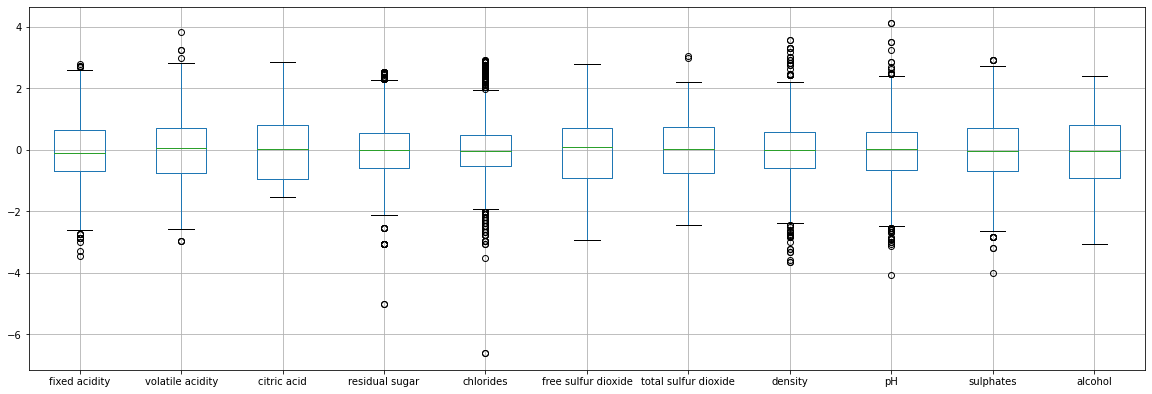

In [23]:
# Plotting boxplots
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Handling class imbalance problems by oversampling the minority class

In [24]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [25]:
y_over.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

### Finding best random_state

In [26]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)
    

Best accuracy is 0.6272430668841762 on Random_state 178


We have found best random_state value as 178 .we will create our train_test split this random_state(178)

### Creating train_test split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state = maxRS)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6272430668841762
[[193  21   0   4   0   0]
 [ 30 120  29  28   3   1]
 [ 23  36 107  27   7   7]
 [  9  19  27  66  38   9]
 [  1   6   3  36 108  59]
 [  0   0   0   0  34 175]]
              precision    recall  f1-score   support

           3       0.75      0.89      0.81       218
           4       0.59      0.57      0.58       211
           5       0.64      0.52      0.57       207
           6       0.41      0.39      0.40       168
           7       0.57      0.51      0.54       213
           8       0.70      0.84      0.76       209

    accuracy                           0.63      1226
   macro avg       0.61      0.62      0.61      1226
weighted avg       0.62      0.63      0.62      1226



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predlr = dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.802610114192496
[[207   1   8   2   0   0]
 [  9 177  13   9   3   0]
 [ 10  19 124  43  10   1]
 [  5   4  32 101  24   2]
 [  0   3   6  18 179   7]
 [  0   0   0   5   8 196]]
              precision    recall  f1-score   support

           3       0.90      0.95      0.92       218
           4       0.87      0.84      0.85       211
           5       0.68      0.60      0.64       207
           6       0.57      0.60      0.58       168
           7       0.80      0.84      0.82       213
           8       0.95      0.94      0.94       209

    accuracy                           0.80      1226
   macro avg       0.79      0.79      0.79      1226
weighted avg       0.80      0.80      0.80      1226



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predlr = rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8947797716150081
[[218   0   0   0   0   0]
 [  5 200   6   0   0   0]
 [  5  13 153  33   3   0]
 [  2   3  29 116  17   1]
 [  0   0   0   4 207   2]
 [  0   0   0   0   6 203]]
              precision    recall  f1-score   support

           3       0.95      1.00      0.97       218
           4       0.93      0.95      0.94       211
           5       0.81      0.74      0.77       207
           6       0.76      0.69      0.72       168
           7       0.89      0.97      0.93       213
           8       0.99      0.97      0.98       209

    accuracy                           0.89      1226
   macro avg       0.89      0.89      0.89      1226
weighted avg       0.89      0.89      0.89      1226



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7969004893964111
[[218   0   0   0   0   0]
 [  4 194  12   1   0   0]
 [ 11  31 116  37  11   1]
 [  2   5  44  78  35   4]
 [  0   3   6  24 162  18]
 [  0   0   0   0   0 209]]
              precision    recall  f1-score   support

           3       0.93      1.00      0.96       218
           4       0.83      0.92      0.87       211
           5       0.65      0.56      0.60       207
           6       0.56      0.46      0.51       168
           7       0.78      0.76      0.77       213
           8       0.90      1.00      0.95       209

    accuracy                           0.80      1226
   macro avg       0.77      0.78      0.78      1226
weighted avg       0.78      0.80      0.79      1226



### Cross validation

In [33]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)

print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.5703879310344828


In [34]:
scr = cross_val_score(dt,x,y,cv=5)

print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.4809110501567398


In [35]:
scr = cross_val_score(rf,x,y,cv=5)

print("Cross validation score of RandomForest model :",scr.mean())

Cross validation score of RandomForest model : 0.5684855015673981


In [36]:
scr = cross_val_score(svc,x,y,cv=5)

print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.567862460815047


Minimum diffrence in accuracy and cross validation score is for RandomForestClassifier so this is our best model.

### Hyper parameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# RandomForestClassifier

parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini','entropy']}

In [39]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [40]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [41]:
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 700}

In [44]:
mod = RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=8,n_estimators=700)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print(accuracy_score(y_test,pred)*100)

84.99184339314844


### Saving the model

In [46]:
import joblib
joblib.dump(mod,'qualityModel.pk1')

['qualityModel.pk1']